In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# korean font setting
import platform

if platform.system() == 'Darwin': # macOS
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv('../data/merged/신용카드VIP회원정보.csv')
df.head()

,Unnamed: 0,기준년월,발급회원번호,연령,VIP등급코드,회원여부_이용가능,회원여부_연체,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급1년이내,...,컨택건수_이용유도_LMS_B0M,컨택건수_이용유도_EM_B0M,컨택건수_이용유도_청구서_B0M,컨택건수_이용유도_인터넷_B0M,컨택건수_이용유도_당사앱_B0M,증감율_이용건수_신용_전월,증감율_이용금액_신용_전월,증감율_이용건수_신용_분기,증감율_이용금액_신용_분기,변동률_잔액_B1M
0,0,201807,SYN_0,40대,7,1,0,1,61,0,...,2,13,0,0,0,0.454549,0.409767,-0.476454,-0.411320,0.261886
1,1,201807,SYN_8,20대,7,1,0,0,0,0,...,2,13,0,1,0,-0.272107,0.137583,0.464710,0.228002,-0.241684
2,2,201807,SYN_9,30대,6,1,0,0,0,0,...,2,3,1,1,0,0.291142,0.329639,-0.345280,-0.061798,0.273881
3,3,201807,SYN_17,70대이상,7,1,0,0,0,0,...,0,0,0,1,0,-0.021992,0.304045,0.057209,-0.196456,0.131636
4,4,201807,SYN_18,40대,7,1,0,0,0,0,...,0,0,0,0,0,0.000000,0.000103,-2.000000,-2.000000,0.093721


# EDA 차트

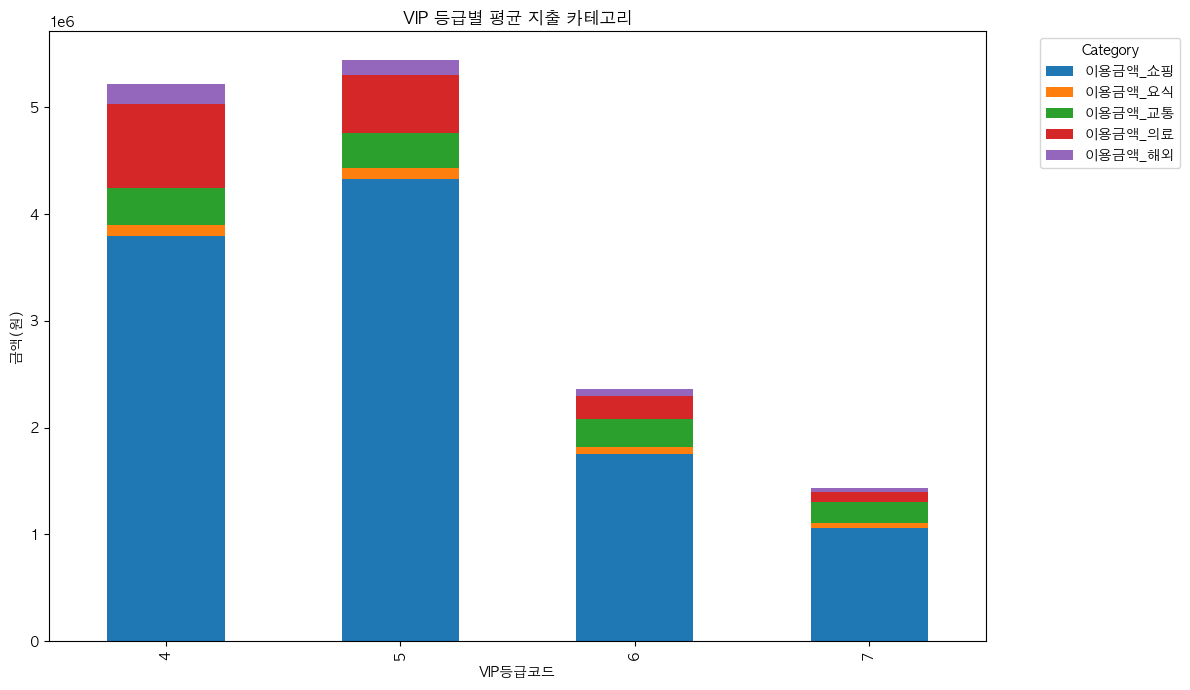

In [5]:
########## 1. VIP 카테고리 지출 내역 ###########
# vip 고객 특성 이해하기  
category_cols = ['이용금액_쇼핑', '이용금액_요식', '이용금액_교통', '이용금액_의료', '이용금액_해외']
vip_spend = df.groupby('VIP등급코드')[category_cols].mean()

vip_spend.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('VIP 등급별 평균 지출 카테고리')
plt.ylabel('금액(원)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/opt/homebrew/anaconda3/envs/mlstudy_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


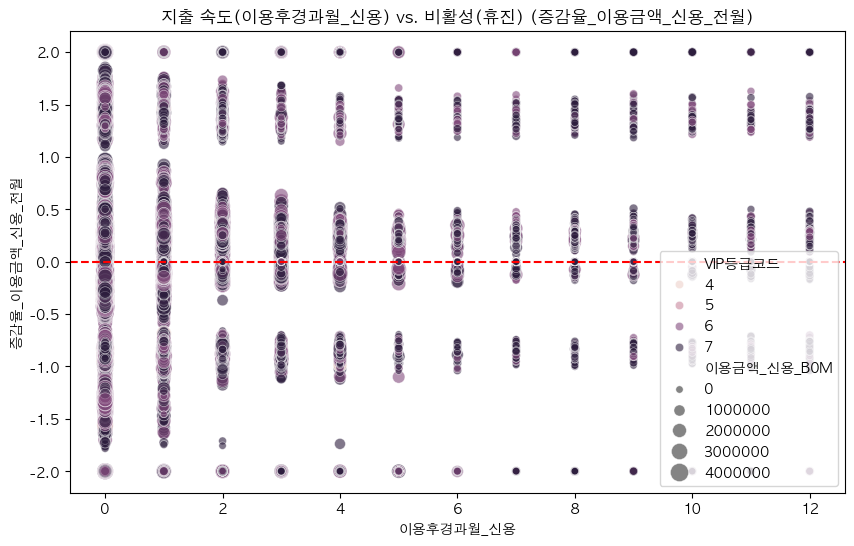

In [6]:
########### 2. 관계: 지출 속도 대 최근성 ###########
# '증감율_이용금액_신용_전월' (Spending Growth) vs '이용후경과월_신용' (Months since last use)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='이용후경과월_신용', y='증감율_이용금액_신용_전월', 
                hue='VIP등급코드', size='이용금액_신용_B0M', sizes=(20, 200), alpha=0.6)
plt.axhline(0, color='red', linestyle='--') # churn line (임시 이탈기준 라인)
plt.title('지출 속도(이용후경과월_신용) vs. 비활성(휴진) (증감율_이용금액_신용_전월)') #Spending Velocity vs. Inactivity (Recency)

plt.show()

'기준년월'
'발급회원번호',
'연령' 
'VIP등급코드'
'회원여부_이용가능' Y
'회원여부_연체'
'탈회횟수_누적'
'최종탈회후경과월'
'탈회횟수_발급1년이내
'거주시도명'
'유효카드수_신용'
'이용카드수_신용'
'이용금액_R3M_신용'
'_1순위카드이용금액'
'_1순위카드이용건수'
'_2순위카드이용금액'
'_2순위카드이용건수'
'Life_Stage'
'CA이자율_할인전'
'강제한도감액금액_R12M'
'한도증액금액_R12M'
'연체감액여부_R3M'
'시장단기연체여부_R3M'
'최종이용일자_신판'
'이용건수_신용_B0M'
'이용금액_신용_B0M'
'이용후경과월_신용'
'이용건수_신용_R12M'
'이용금액_신용_R12M'
'이용가맹점수'
'이용금액_업종기준'
'이용금액_쇼핑'
'이용금액_요식'
'이용금액_교통'
'이용금액_의료'
'이용금액_납부'
'이용금액_교육'
'이용금액_여유생활'
'이용금액_사교활동'
'이용금액_일상생활'
'이용금액_해외'
'RP건수_B0M'
'RP금액_B0M'
'이용금액대'
'포인트_잔여포인트_B0M'
'마일_잔여포인트_B0M'
'잔액_B0M_x'
'연체일수_B2M_x'
'월중평잔_x'
'평잔_3M_x'
'평잔_6M_x'
'잔액_B0M_y'
'연체일수_B2M_y'
'월중평잔_y'
'평잔_3M_y'
'평잔_6M_y'
'컨택건수_이용유도_TM_B0M'
'컨택건수_이용유도_LMS_B0M'
'컨택건수_이용유도_EM_B0M',
'컨택건수_이용유도_청구서_B0M'
'컨택건수_이용유도_인터넷_B0M'
'컨택건수_이용유도_당사앱_B0M'
'증감율_이용건수_신용_전월'
'증감율_이용금액_신용_전월'
'증감율_이용건수_신용_분기'
'증감율_이용금액_신용_분기'
'변동률_잔액_B1M'

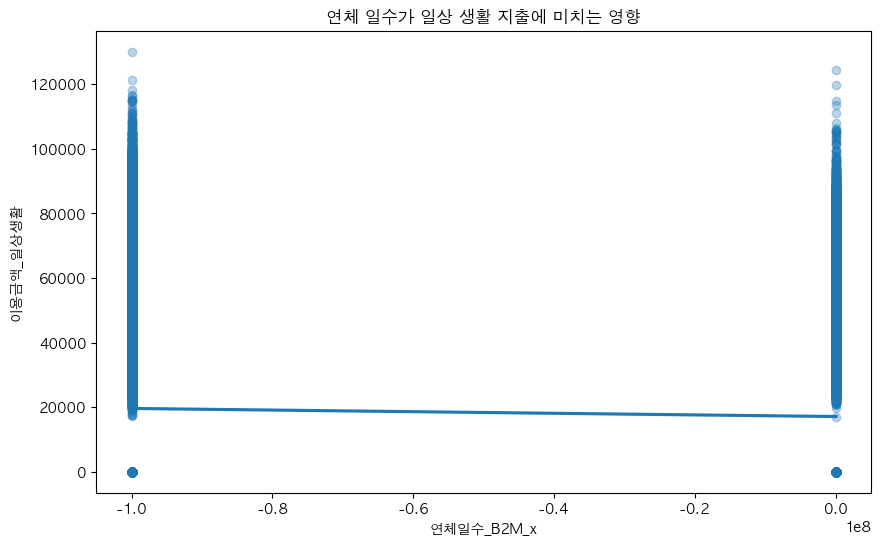

In [8]:
########### 3. 연체(연체)가 지출에 미치는 영향  (연체 vs spending) ###########
# '연체일수'(연체일)을 사용하는 사용자가 재량 지출을 줄이고 있는지 확인하기

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='연체일수_B2M_x', y='이용금액_일상생활', scatter_kws={'alpha':0.3})
plt.title('연체 일수가 일상 생활 지출에 미치는 영향') #(Impact of Overdue Days on Daily Life Spending)
plt.show()

/var/folders/wb/bbyhbcc95_l7p6410jysv6tm0000gn/T/ipykernel_16703/3280078644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Life_Stage', y='이용금액_신용_R12M', palette='husl')


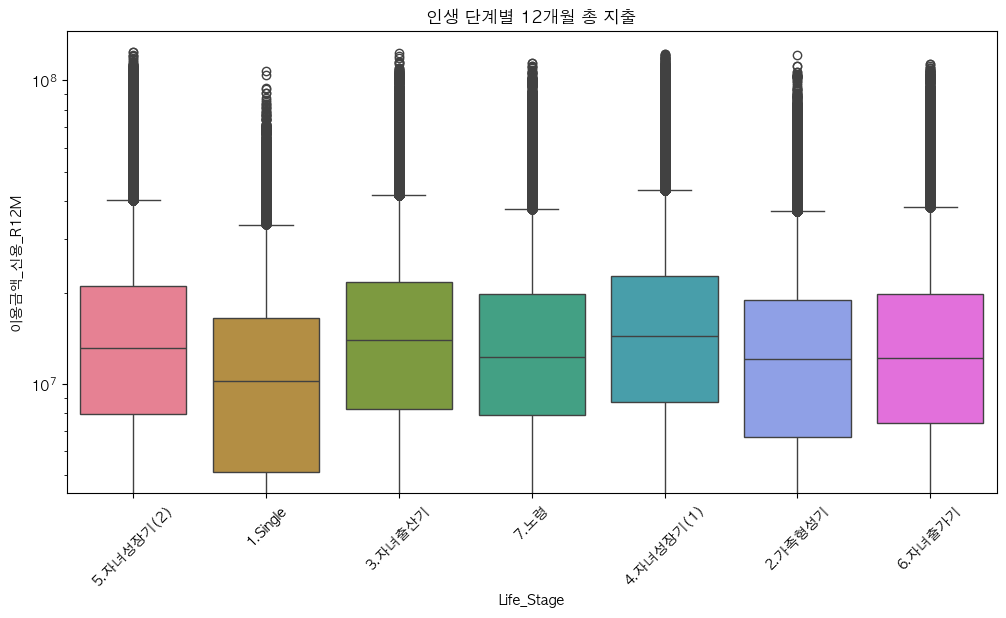

In [7]:
########### 4. Life Stage 분석 ###########
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Life_Stage', y='이용금액_신용_R12M', palette='husl')
plt.yscale('log') # 지출의 분산이 높습니다
plt.title('인생 단계별 12개월 총 지출')
plt.xticks(rotation=45)
plt.show()

In [9]:
########## 5. Heatmap: 사용자 행동 및 재무 위험 ###########

# 관계 알아보고싶은 컬럼 목록
corr_cols = [
    '연령', '유효카드수_신용', '이용금액_신용_R12M', '연체일수_B2M_x', 
    '포인트_잔여포인트_B0M', '증감율_이용금액_신용_전월', '이용금액_쇼핑', '이용금액_요식'
]

plt.figure(figsize=(12, 10))
correlation_matrix = df[corr_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, fmt=".2f")
plt.title('사용자 행동과 재무 위험의 상관 행렬')  #correlation: User Behavior and Financial Risk



ValueError: could not convert string to float: '40대'

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 58.7222222222222, '지출 카테고리')

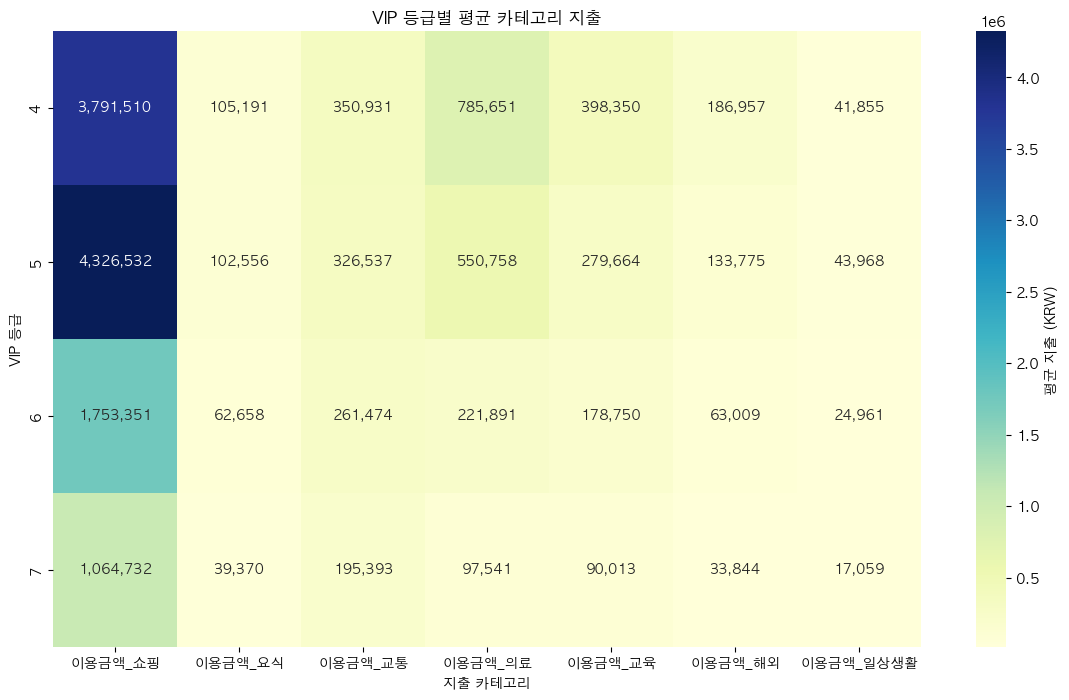

In [12]:
########## 6. Heatmap: 지출 패턴 VIP 대 카테고리별 ###########
# VIP 등급별로 그룹화된 각 카테고리의 평균 지출 (Spending Pattern Heatmap vip vs category)
category_cols = [
    '이용금액_쇼핑', '이용금액_요식', '이용금액_교통', '이용금액_의료', 
    '이용금액_교육', '이용금액_해외', '이용금액_일상생활'
]

vip_category_pivot = df.groupby('VIP등급코드')[category_cols].mean()

plt.figure(figsize=(14, 8))
sns.heatmap(vip_category_pivot, annot=True, fmt=",.0f", cmap='YlGnBu', cbar_kws={'label': '평균 지출 (KRW)'})
plt.title('VIP 등급별 평균 카테고리 지출')
plt.ylabel('VIP 등급')
plt.xlabel('지출 카테고리')

/opt/homebrew/anaconda3/envs/mlstudy_env/lib/python3.12/site-packages/IPython/core/events.py:96: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/mlstudy_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


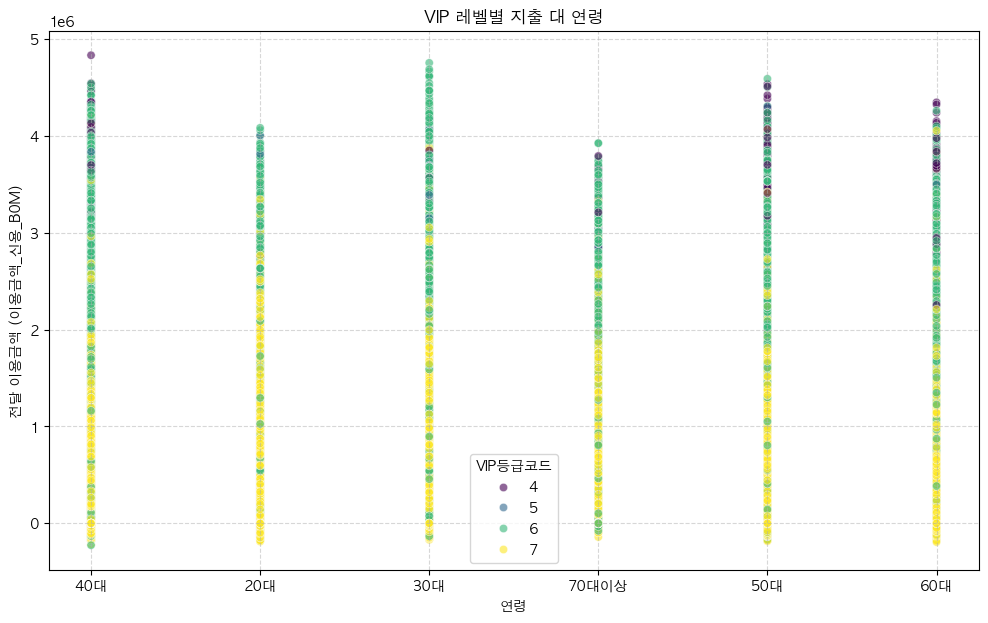

In [13]:
########## 7. 산점도 (Scatter Plot) : 연령 대 지출 ###########
# 연령 대 지출 (VIP 등급별 색상) VIP Grade 별로
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df, 
    x='연령', 
    y='이용금액_신용_B0M', 
    hue='VIP등급코드', 
    alpha=0.6, 
    palette='viridis'
)
plt.title('VIP 레벨별 지출 대 연령') #(Spending vs. Age by VIP Level)
plt.xlabel('연령')
plt.ylabel('전달 이용금액 (이용금액_신용_B0M)') #Last Month Spend
plt.grid(True, linestyle='--', alpha=0.5)

In [14]:
########## 8. Heatmap : 연령 대 VIP등급코드 ###########
df['Age_Group'] = (df['연령'] // 10 * 10).astype(str) + 's'

pivot_table = df.pivot_table(
    index='Age_Group', 
    columns='VIP등급코드', 
    values='이용금액_신용_B0M', 
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=",.0f", cmap='YlOrRd')
plt.title('지난달 평균 지출: 연령대 대 VIP 등급')
plt.ylabel('연령대')
plt.xlabel('VIP 등급')

TypeError: unsupported operand type(s) for //: 'str' and 'int'

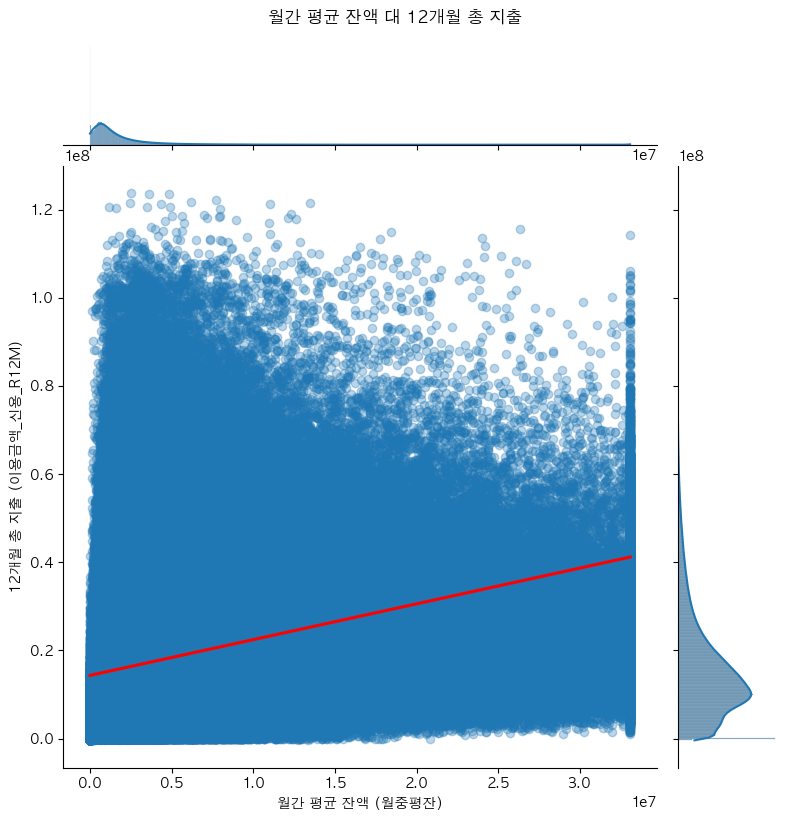

In [15]:
########## 8. jointplot : 월간 평균 잔액 대 12개월 총 지출 ###########

# 회귀 regression line
g = sns.jointplot(
    data=df, 
    x='월중평잔_x', 
    y='이용금액_신용_R12M', 
    kind='reg', 
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'},
    height=8
)

g.figure.suptitle('월간 평균 잔액 대 12개월 총 지출', y=1.02)
g.set_axis_labels('월간 평균 잔액 (월중평잔)', '12개월 총 지출 (이용금액_신용_R12M)')

plt.show()

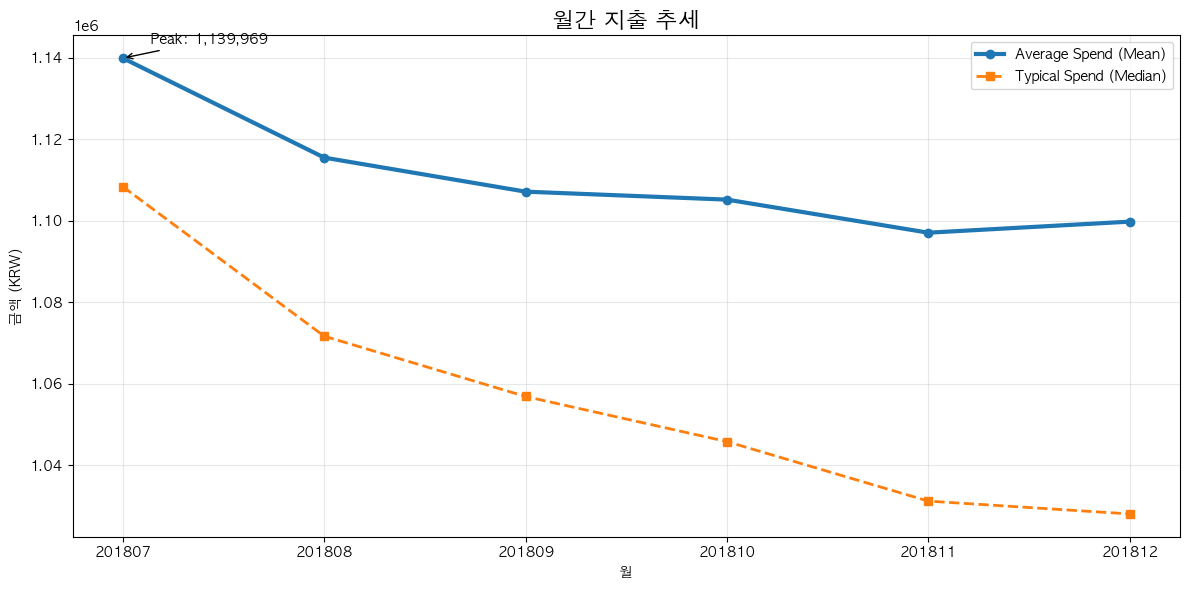

In [ ]:
########## 9. jointplot : 월간 지출 추세 ###########

# 월별 평균 중앙값 
monthly_spend = df.groupby('기준년월')['이용금액_신용_B0M'].agg(['mean', 'median']).reset_index()

# 라인차트
plt.figure(figsize=(12, 6))

# 평균
plt.plot(monthly_spend['기준년월'].astype(str), monthly_spend['mean'], 
         marker='o', linewidth=3, label='Average Spend (Mean)', color='#1f77b4')

# 중앙값
plt.plot(monthly_spend['기준년월'].astype(str), monthly_spend['median'], 
         marker='s', linewidth=2, label='Typical Spend (Median)', color='#ff7f0e', linestyle='--')

plt.title('월간 지출 추세', fontsize=16) # Monthly Spending Trend (컬럼: 이용금액_신용_B0M)
plt.ylabel('금액 (KRW)')
plt.xlabel('월')
plt.legend()
plt.grid(True, alpha=0.3)

max_val = monthly_spend['mean'].max()
max_month = monthly_spend.loc[monthly_spend['mean'].idxmax(), '기준년월']
plt.annotate(f'Peak: {max_val:,.0f}', 
             xy=(str(max_month), max_val), 
             xytext=(20, 10), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='black'))

plt.tight_layout()
plt.show()